In [12]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LightSource
from matplotlib import cm

def diversity_gradient(dfdw_train, dfdw_val, mylambda, sigma_p,multi1=1,multi2=1):
    """
    This is the gradient of the diversity term.

    Parameters
    ----------
    dfdw_train: float
        the gradient of the output of a neural network, with respect to a single weight, given a training sample.
    dfdw_val: float
        the gradient of the output of a neural network, with respect to a single weight, given a validation sample.
    mylambda: float
        the temperature parameter when estimating a posterior
    sigma_p: float
        the prior variance

    Returns
    -------
    grad: float
        the diversity gradient.
    """
    term1 = multi1*(-1)*(mylambda*dfdw_train**2+1/sigma_p)**(-2)*(2*mylambda*dfdw_train**3)*dfdw_val**2
    term2 = multi2*(mylambda*dfdw_train**2+1/sigma_p)**(-1)*2*dfdw_val**3
    grad = term1+term2
    return grad

def experiment(multi1=1, multi2=1):

    dfdw_train = np.linspace(-0.6,0.6,1000)
    dfdw_val = np.linspace(-0.6,0.6,1000)
    mylambda = 10000
    sigma_p = 0.01
    xx, yy = np.meshgrid(dfdw_train, dfdw_val)
    zz = diversity_gradient(xx, yy, mylambda=mylambda,sigma_p=sigma_p, multi1=multi1, multi2=multi2)

    return dfdw_train, dfdw_val, zz

def plt_subfigure(ax, dfdw_train, dfdw_val, zz, multi1=1, multi2=1):

    im = ax.pcolormesh(dfdw_train,dfdw_val,zz,cmap='plasma')
    ax.contour(dfdw_train,dfdw_val,zz, levels=20, colors='k')
    ax.set_xlabel(r'$\frac{\partial p(y_t;\boldsymbol{x}_t,\boldsymbol{\mathrm{w}})}{\partial \boldsymbol{\mathrm{w}}_j}$', fontsize=labelsize)
    ax.set_ylabel(r'$\frac{\partial f_a(\boldsymbol{x}_u;\boldsymbol{\mathrm{w}})}{\partial \boldsymbol{\mathrm{w}}_j}$', fontsize=labelsize)
    ax.grid(linestyle=':')
    plt.colorbar(im, ax=ax)
    plt.tight_layout()
    ax.set_title(r'$\phi='+str(multi1)+', \chi='+str(multi2)+'$', fontsize=labelsize)
    ax.set_xlim([-0.6, 0.6])
    return


[[<AxesSubplot: > <AxesSubplot: > <AxesSubplot: >]
 [<AxesSubplot: > <AxesSubplot: > <AxesSubplot: >]]


Text(0.5, 1.1, '$\\frac{\\partial^2\\log p(y_i;f)}{\\partial w^2} \\approx \\phi \\left(\\frac{\\partial\\log p(y_i;f)}{\\partial w}\\right)^2 \\; \\mathrm{and} \\; \\frac{\\partial^2 f_{a}(\\boldsymbol{x}_j;f)}{\\partial w^2} \\approx \\chi \\left(\\frac{\\partial f_{a}(\\boldsymbol{x}_j;f)}{\\partial w}\\right)^2$')

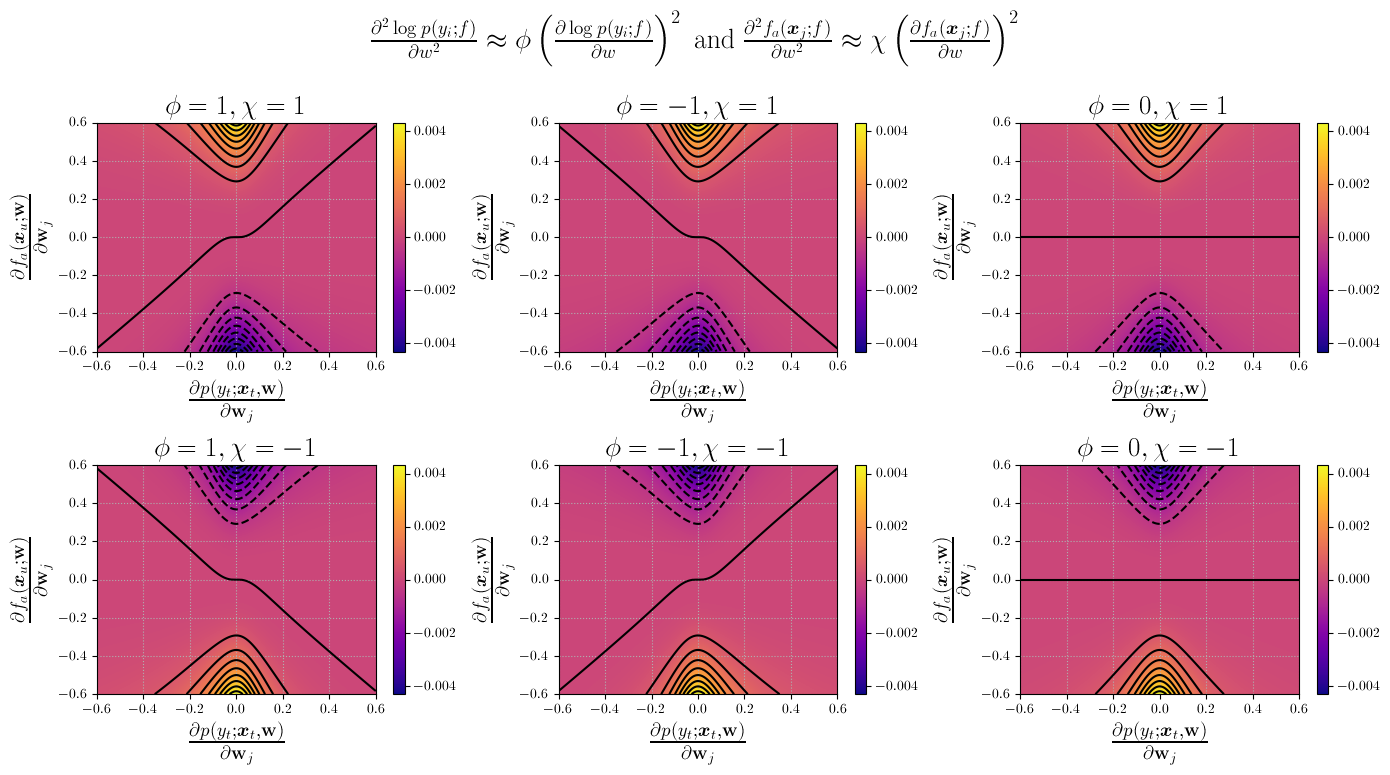

In [13]:
labelsize = 20


f, axs = plt.subplots(2, 3,figsize = (14, 7))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

print(axs)

dfdw_train, dfdw_val, zz = experiment(multi1=1, multi2=1)
plt_subfigure(axs[0,0], dfdw_train, dfdw_val, zz, multi1=1, multi2=1)

dfdw_train, dfdw_val, zz = experiment(multi1=1, multi2=-1)
plt_subfigure(axs[1,0], dfdw_train, dfdw_val, zz, multi1=1, multi2=-1)

dfdw_train, dfdw_val, zz = experiment(multi1=-1, multi2=1)
plt_subfigure(axs[0,1], dfdw_train, dfdw_val, zz, multi1=-1, multi2=1)

dfdw_train, dfdw_val, zz = experiment(multi1=-1, multi2=-1)
plt_subfigure(axs[1,1], dfdw_train, dfdw_val, zz, multi1=-1, multi2=-1)

dfdw_train, dfdw_val, zz = experiment(multi1=0, multi2=1)
plt_subfigure(axs[0,2], dfdw_train, dfdw_val, zz, multi1=0, multi2=1)

dfdw_train, dfdw_val, zz = experiment(multi1=0, multi2=-1)
plt_subfigure(axs[1,2], dfdw_train, dfdw_val, zz, multi1=0, multi2=-1)
f.suptitle(r'$\frac{\partial^2\log p(y_i;f)}{\partial w^2} \approx \phi \left(\frac{\partial\log p(y_i;f)}{\partial w}\right)^2 \; \mathrm{and} \; \frac{\partial^2 f_{a}(\boldsymbol{x}_j;f)}{\partial w^2} \approx \chi \left(\frac{\partial f_{a}(\boldsymbol{x}_j;f)}{\partial w}\right)^2$', y=1.1, fontsize=labelsize)

This plot has a nice interpretation. For a given weight, the diversity term is non-zero if the validation gradient is non-zero and the training gradient is close to zero.

In [14]:
f.savefig('approximations.png', dpi=600)